In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import missingno
from konlpy.tag import Okt
import re
from tqdm import tqdm, trange
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

ma = Okt()

In [4]:
# crawl to db
con = sqlite3.connect('../news_Crawl.db')
cur = con.cursor()

In [12]:
cur.execute('''
    SELECT id, title, content, category, dateNews FROM news WHERE content != '';
''')
articles = cur.fetchall()

In [13]:
len(articles)

3558

In [14]:
articles = pd.DataFrame(articles)

In [18]:
articles.head(10)

(                      0                                              1  \
 0  AKR20221207132500001   "이태원참사 다음날 대통령 주재 회의서 &apos압사&apos 빼라 지시 나와"   
 1  AKR20221207135900051           [부산 대학가 소식] 동의대 부속 동의어린이집, 보육공모전 우수상   
 2  AKR20221207133900111  &aposUAE 우주포럼&apos 첫 회의, "패권 경쟁보다 협력" 강조하며 폐막   
 3  AKR20221207111000009         대만 TSMC, 미국서 4나노 2024년·3나노 2026년 생산 시작   
 4  AKR20221207123800009                러 전직 장관이 우크라 농지 싹쓸이…"뉴욕시 면적 2배"   
 5  AKR20221207134500053                  진화에만 2시간…소방당국, 전기차 화재 대응에 골머리   
 6  AKR20221207128100805                  [여행소식] 해외 명품 아웃렛 잇달아 한국 시장 공략   
 7  AKR20221207135600054              한국마이크로소프트 혁신허브, 전남대서 개소…"스타트업 지원"   
 8  AKR20221206140251004    중랑구에 &apos서울형 키즈카페&apos 2호점…놀이기구 14종 구비(종합)   
 9  AKR20221207124700001            대통령실 "일많은데 무슨 한동훈 차출이냐? 그게 尹대통령 생각"   
 
                                                    2     3          4  
 0   (서울=연합뉴스) 조민정 박경준 기자 = 이태원 압사 참사 다음 날 윤석열 대통령...    정치  221207132  
 1  [동의대 제공] 수근종합건설, 동아대 경영

In [20]:
articles[3].describe()

count     3558
unique      13
top         사회
freq       777
Name: 3, dtype: object

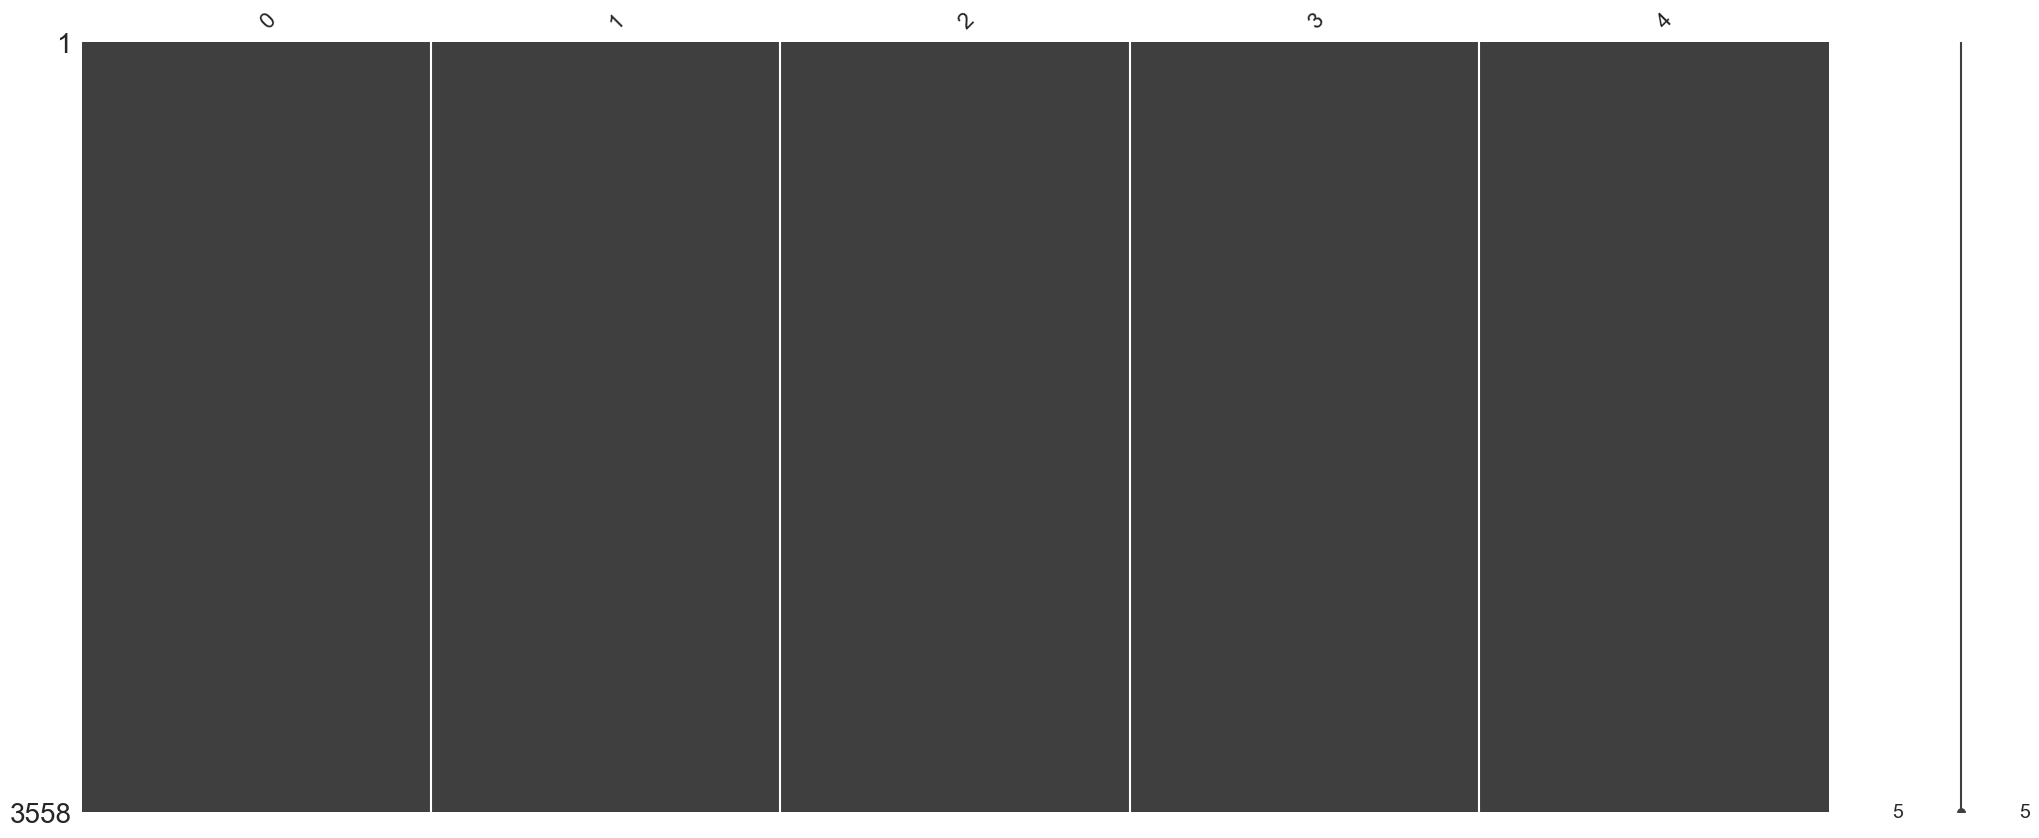

In [16]:
missingno.matrix(articles)
plt.show()

In [31]:
# 전처리
articles[5] = articles[2].apply(lambda x: re.sub('[^0-9A-Za-zㄱ-ㅎㅏ-ㅣ가-힣 ]', ' ', x))
articles[5] = articles[5].apply(lambda x: re.sub(r'\s{2,}', ' ', x))
articles[5] = articles[5].apply(lambda x: ma.morphs(x))
corpus = articles[5].apply(lambda x: ' '.join(x))
corpus.head(10)

0    [서울, 연합뉴스, 조, 민정, 박경준, 기자, 이태원, 압사, 참사, 다음, 날,...
1    [동의대, 제공, 수근, 종합, 건설, 동아대, 경영, 대학원, 장학, 기금, 3억...
2    [아부다비, 연합뉴스, 이승민, 특파원, 아부다비, 스페이스, 디, 베이트, 포럼,...
3    [타이베이, 연합뉴스, 김, 철문, 통신원, 세계, 최대, 파운드리, 반도체, 위탁...
4    [서울, 연합뉴스, 오, 진송, 기자, 러시아, 전직, 장관, 이, 민간인, 신분,...
5    [영주, 연합뉴스, 김선형, 기자, 사람, 이, 탑승, 한, 전기차, 화재, 에, ...
6    [맥아더, 글렌, 디자이너, 아웃렛, 한국, 사무소, 개소, 10, 주년, 기념, ...
7    [광주, 연합뉴스, 손상, 원, 기자, 중소기업, 스타트업, 을, 지원, 하는, 한...
8    [서울, 연합뉴스, 김준태, 기자, 서울시, 는, 중랑구, 에, 서울, 형, 키즈,...
9    [서울, 연합뉴스, 정아, 란, 한지훈, 기자, 윤석열, 대통령, 이, 여당, 전당...
Name: 5, dtype: object

In [73]:
CV = CountVectorizer()
x = CV.fit_transform(corpus)
tfid = TfidfTransformer(sublinear_tf=True)
x = tfid.fit_transform(x)
# corpus

In [74]:
# TF-IDF - 어떻게 해석해야 하는가
pipe = Pipeline([('count', CountVectorizer()),
                 ('tfidf', TfidfTransformer(sublinear_tf=True))]).fit_transform(corpus)

In [76]:
with open('news_TFIDF.pickle', 'wb') as f:
    pickle.dump(pipe, f)